![](https://i.imgur.com/c2KhYrV.png)

# Introduction

The notebook of our group is used as a reference to build a Check-In application. The camera is attached on wall or using webcam of laptop to recognise faces of students, then confirming present or absense of those students. 

Members of group: Tien, Natalie and Ly

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Collecting-data" data-toc-modified-id="Collecting-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Collecting data</a></span><ul class="toc-item"><li><span><a href="#For-each-image" data-toc-modified-id="For-each-image-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>For each image</a></span></li><li><span><a href="#Convert-image-to-pixels-array,-array-has-shape-(width,-height,-3)" data-toc-modified-id="Convert-image-to-pixels-array,-array-has-shape-(width,-height,-3)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Convert image to pixels array, array has shape (width, height, 3)</a></span></li><li><span><a href="#Use-mtcnn-(-a-library-for-detect-face-)-to-detect-face" data-toc-modified-id="Use-mtcnn-(-a-library-for-detect-face-)-to-detect-face-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Use mtcnn ( a library for detect face ) to detect face</a></span></li><li><span><a href="#Có-tọa-độ-2-mắt,-từ-đó-tính-ra-độ-nghiêng-của-khuôn-mặt-trong-hình" data-toc-modified-id="Có-tọa-độ-2-mắt,-từ-đó-tính-ra-độ-nghiêng-của-khuôn-mặt-trong-hình-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Có tọa độ 2 mắt, từ đó tính ra độ nghiêng của khuôn mặt trong hình</a></span></li><li><span><a href="#Xoay-mặt-theo-độ-nghiêng-vừa-tính-ra-ở-trên-để-khuôn-mặt-thẳng-đứng-so-với-hình" data-toc-modified-id="Xoay-mặt-theo-độ-nghiêng-vừa-tính-ra-ở-trên-để-khuôn-mặt-thẳng-đứng-so-với-hình-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Xoay mặt theo độ nghiêng vừa tính ra ở trên để khuôn mặt thẳng đứng so với hình</a></span></li><li><span><a href="#Use-face-detector-to-again-to-detect-face-in-the-rotated-image,-then-crop-face-to-cut-out-the-background" data-toc-modified-id="Use-face-detector-to-again-to-detect-face-in-the-rotated-image,-then-crop-face-to-cut-out-the-background-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Use face detector to again to detect face in the rotated image, then crop face to cut out the background</a></span></li><li><span><a href="#Resize-the-image-in-order-to-fit-in-CNN:-depend-on-the-input-shape-of-CNN-model-we-are-going-to-use" data-toc-modified-id="Resize-the-image-in-order-to-fit-in-CNN:-depend-on-the-input-shape-of-CNN-model-we-are-going-to-use-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Resize the image in order to fit in CNN: depend on the input shape of CNN model we are going to use</a></span></li><li><span><a href="#Chia-tất-cả-hình-đã-qua-xử-lý-thành-2-phần-train-và-test-(-test_size-=-0.2-)" data-toc-modified-id="Chia-tất-cả-hình-đã-qua-xử-lý-thành-2-phần-train-và-test-(-test_size-=-0.2-)-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Chia tất cả hình đã qua xử lý thành 2 phần train và test ( test_size = 0.2 )</a></span></li><li><span><a href="#Some-example-after-all-process-steps" data-toc-modified-id="Some-example-after-all-process-steps-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Some example after all process steps</a></span></li><li><span><a href="#After:" data-toc-modified-id="After:-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>After:</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Approach-1:" data-toc-modified-id="Approach-1:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Approach 1:</a></span></li><li><span><a href="#Approach-2:-Use-Keras-FaceNet-to-extract-features" data-toc-modified-id="Approach-2:-Use-Keras-FaceNet-to-extract-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Approach 2: Use Keras FaceNet to extract features</a></span></li></ul></li></ul></div>

## Collecting data

The first thing of all is, collecting all faces of all students in Mariana class

![](https://i.imgur.com/LycGKOo.png)

- Camera is put right in front of student's face
- Using Haar Cascade function of OpenCV to detect human face
- Cropping area of detection only
- Saving image in drive

In [3]:
import numpy as np
import time
import cv2

# default parameters 
colour = (255, 0, 0)
thickness = 1

path_img_auto = "./data/ly/ly_auto"  # save image in folder
cap = cv2.VideoCapture(0)

# apply Haar Cascade to detect human face
face_cascade_1 = cv2.CascadeClassifier('.\lib\opencv-master\data\haarcascades\haarcascade_frontalface_alt.xml')
face_cascade_2 = cv2.CascadeClassifier('.\lib\opencv-master\data\lbpcascades\lbpcascade_frontalface_improved.xml')

frame_rate = 10  #choose recording speed 
prev = 0
i = 1  # save iamge as formatted pattern and increasing image by image

while(True):
	time_elapsed = time.time() - prev
	# Capture frame-by-frame
	ret, frame = cap.read()
	if time_elapsed > 1./frame_rate:
		prev = time.time()


		gray = frame
		faces_1 = face_cascade_1.detectMultiScale(gray, 1.3, 5)
		faces_2 = face_cascade_2.detectMultiScale(gray, 1.3, 5)
		crop_face = gray

		if faces_1 is not None:
			for (x,y,w,h) in faces_1:
				crop_face = gray[y: y + h, x : x + w]
				path = path_img_auto + str(i) + ".jpg"
				i += 1
				cv2.imwrite(path, crop_face)
				gray = cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
		elif faces_2 is not None:
			for (x,y,w,h) in faces_2:
				crop_face = gray[y: y + h, x : x + w]
				path = path_img_auto + str(i) + ".jpg"
				i += 1
				cv2.imwrite(path, crop_face)
				gray = cv2.rectangle(gray,(x,y),(x+w,y+h),(0,255,0),2)

		# Display the resulting frame
		cv2.imshow('Camera',frame)

		if cv2.waitKey(1) & 0xFF == ord('q'):
			break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


# Tổng quan về dataset
Dataset has 11 persons  
Each person has around 1000 images

# Process Image: Cân chỉnh mặt để mặt nằm giữa khung hình

### For each image

### Convert image to pixels array, array has shape (width, height, 3)

### Use mtcnn ( a library for detect face ) to detect face

For example with image: 
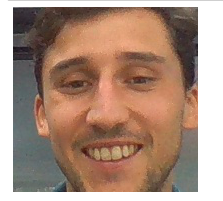

After use mtcnn to detect face, we have some coordinates:
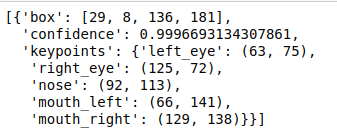
- box coordinate [x, y, width, height], là tọa độ để xác định boundary box bao quanh khuôn mặt
- keypoints là tọa độ của vài bộ phận trên mặt như:
    - Left eye 
    - Right eye
    - Nose
    ...

### Có tọa độ 2 mắt, từ đó tính ra độ nghiêng của khuôn mặt trong hình

left_eye = $(x_{left}, y_{left})$  
right_eye = $(x_{right}, y_{right})$

```python
def calculate_angle(left_eye, right_eye):
    dX = right_eye[0] - left_eye[0]
    dY = right_eye[1] - left_eye[1]
    angle = np.degrees(np.arctan2(dY, dX))
    return angle
```

### Xoay mặt theo độ nghiêng vừa tính ra ở trên để khuôn mặt thẳng đứng so với hình

```python
angle = calculate_angle(left_eye, right_eye)

def rotate_image(arr_img, angle):
    image = Image.fromarray(arr_img)
    image = image.rotate(angle)
    arr_img = np.asarray(image)
    return arr_img
```

For example: 

Before
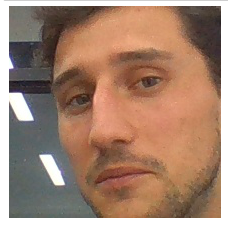

Một tí hình học:
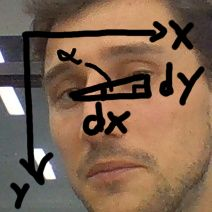


After rotate:
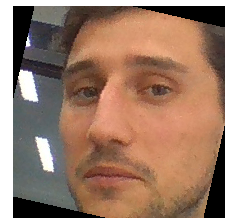

### Use face detector to again to detect face in the rotated image, then crop face to cut out the background
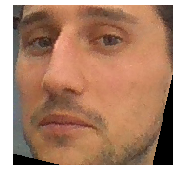

### Resize the image in order to fit in CNN: depend on the input shape of CNN model we are going to use

### Chia tất cả hình đã qua xử lý thành 2 phần train và test ( test_size = 0.2 )

### Some example after all process steps

Before:
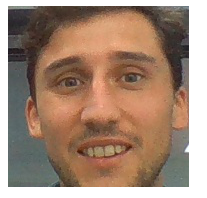
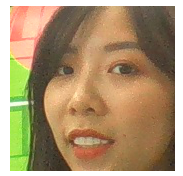
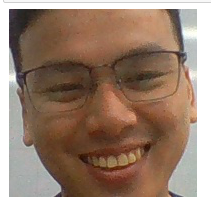

### After:
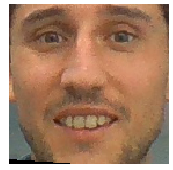
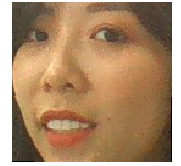
Center tiled head:
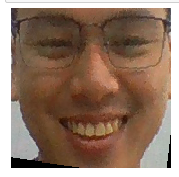

## Model

- Vì làm app nhận diện khuôn mặt real-time. Không dùng được CNN để classify kiểu softmax, frame hình trong real-time biến đổi liên tục, máy tính không handle hết được.

- Dùng pretrained model để extract features của mỗi hình ( khoảng 128, 256, 512 features ). Khoảng cách giữa feature vectors của cùng một người sẽ gần nhau hơn khi so với người khác. 
For example:

Felix1: 
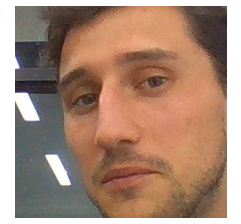
Felix2: 
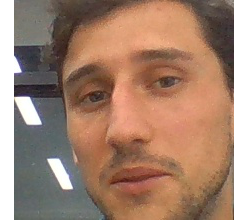
Tan: 
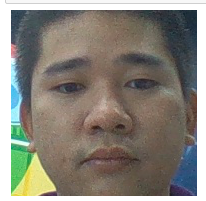
Natalie:
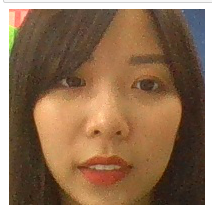

Sau khi dùng model để extract 128 features riêng của từng hình:
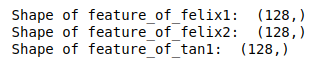

Ta tính Euclidean Distance:
```python 
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))
```
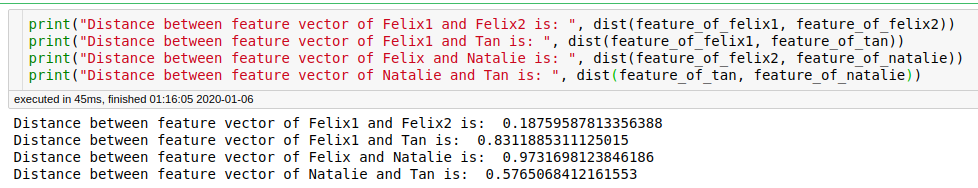


- Dùng classifer của machine learning (SVM) để  classify từng người dựa vào các feature vector của người đó. Set probability threshold để đảm bảo độ chính xác ở real-time

### Approach 1:


1. Load pretrained model, in this case is Xception 
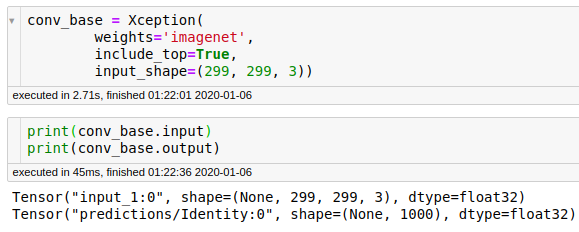
Xception has output layer is classify layer for 1000 class, we don't need it so we cut it out

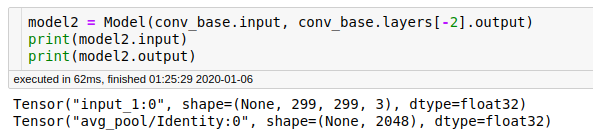
Our new model has output layer is AVGPool, output shape is a vector that contains 2048 features of each sample 

2. We pass every image into Xception to extract feature of each image:  

```python
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count, label_count, pretrained_model):
    features = np.zeros(shape=(sample_count, 2048))
    labels = np.zeros(shape=(sample_count,label_count))
```
```python
    generator = datagen.flow_from_directory(
            directory,
            target_size=(299, 299),
            batch_size=batch_size,
            class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = pretrained_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2400, 4, model2)
test_features, test_labels = extract_features(test_dir, 800, 4, model2)
```
From this function, we get feature (x_train, x_test) and labels (y_train, y_test

3. Standardize feature vector

    
4. Now we have 2048 features for each image. I think that dimension is too large for SVM. So I use PCA to reduce dimension ( reduce from 2048 to 128 ). Then fit to SVM
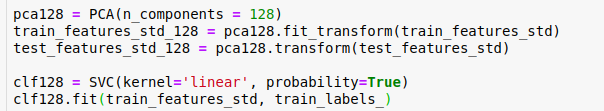


5. Evaluate accuracy score, more than 99% accuracy. Easy to understand since there are around 1000 images for each person , each of image is processed to center the face in image, and Xception has more than 20 millions parameter to extract feature
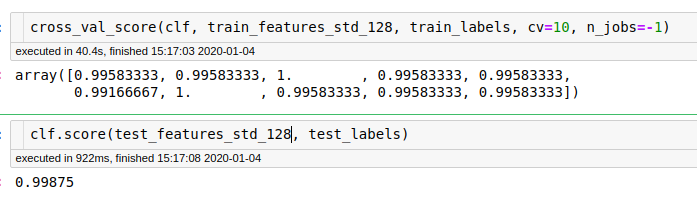

### Approach 2: Use Keras FaceNet to extract features

1. Load FaceNet model:
```python
model = load_model(MODEL_DIR)
```
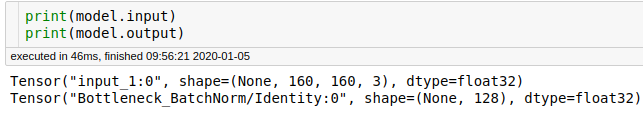
Can see that the output layer already return 128 features of each image. SO that we can skip PCA

2. After use FaceNet to extract feature, we also have x_train, y_train, x_test, y_test:
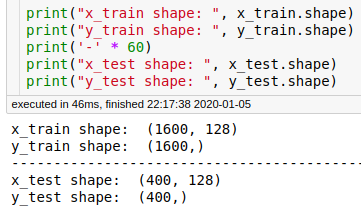

3. Normalize x_train, x_test because the vectors are often compared to each other using a distance metric. And because labels are names with type string. I use LabelEncoder for labels

4. After fit data in SVM then evaluate the accuracy score, still above 99%
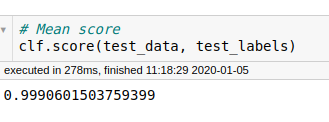

# Predict

1. Use face detector with openCV to detect face in each frame
2. Crop the face image then convert to array with dtype=np.float32 ( face array have shape(width, height, 3)
3. Resize the array to (160, 160, 3) để bằng với shape của FaceNet input layer 
4. Standardize the array and expand dimension to (1, 160, 160, 3)
5. Extract its feature with FaceNet
6. Normalize the 128 features in order to predict with SVM. We predict the label and confidence probability 
7. Use LabelEncoder to inverse_transform from number to name
8. Set threshold (probability > 80%) to render name on frame

# Performance

1. Define variable i to track the frame, we will predict after every 10 - 20 frames in order to improve the performance ( instead of preprocess and predict every frame, that will drop down the fps from 30 to 2 - 3 fps )